In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Train'
valid_path = 'Test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('Train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 775 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 322 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\nafem\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
7/7 [==============================] - 32s 3s/step - loss: 1.2660 - accuracy: 0.5843 - val_loss: 1.5881 - val_accuracy: 0.4224
Epoch 2/100
7/7 [==============================] - 10s 1s/step - loss: 1.1556 - accuracy: 0.5816 - val_loss: 1.1512 - val_accuracy: 0.6211
Epoch 3/100
7/7 [==============================] - 9s 1s/step - loss: 1.1112 - accuracy: 0.6945 - val_loss: 0.8354 - val_accuracy: 0.6770
Epoch 4/100
7/7 [==============================] - 9s 1s/step - loss: 0.6784 - accuracy: 0.7168 - val_loss: 0.5767 - val_accuracy: 0.7950
Epoch 5/100
7/7 [==============================] - 9s 2s/step - loss: 0.4368 - accuracy: 0.8567 - val_loss: 0.6314 - val_accuracy: 0.7143
Epoch 6/100
7/7 [==============================] - 9s 1s/step - loss: 0.4245 - accuracy: 0.8483 - val_loss: 0.7345 - val_accuracy: 0.6491
Epoch 7/100
7/7 [==============================] - 10s 1s/step - loss: 0.3855 - accuracy: 0.8679 - val_loss: 0.6292 - val_accuracy: 0.6957
Epoch 8/100
7/7 [==============

Epoch 60/100
7/7 [==============================] - 10s 1s/step - loss: 0.0725 - accuracy: 0.9862 - val_loss: 0.6650 - val_accuracy: 0.7671
Epoch 61/100
7/7 [==============================] - 9s 1s/step - loss: 0.0580 - accuracy: 0.9928 - val_loss: 0.5888 - val_accuracy: 0.7826
Epoch 62/100
7/7 [==============================] - 9s 1s/step - loss: 0.0641 - accuracy: 0.9867 - val_loss: 0.7323 - val_accuracy: 0.7453
Epoch 63/100
7/7 [==============================] - 10s 1s/step - loss: 0.0539 - accuracy: 0.9901 - val_loss: 0.5707 - val_accuracy: 0.7671
Epoch 64/100
7/7 [==============================] - 9s 1s/step - loss: 0.0529 - accuracy: 0.9973 - val_loss: 0.6377 - val_accuracy: 0.7547
Epoch 65/100
7/7 [==============================] - 10s 1s/step - loss: 0.0506 - accuracy: 0.9900 - val_loss: 0.6698 - val_accuracy: 0.7516
Epoch 66/100
7/7 [==============================] - 9s 1s/step - loss: 0.0550 - accuracy: 0.9851 - val_loss: 0.6132 - val_accuracy: 0.7453
Epoch 67/100
7/7 [======

In [14]:
test_score = model.evaluate_generator(test_set, 128)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

C:\Users\nafem\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 77.95%
[INFO] Loss:  0.5632528066635132


Text(0.5, 1.0, 'Accuracy Curves')

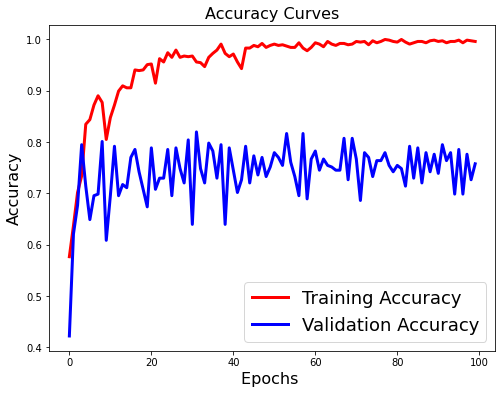

In [15]:
# Accuracy Curves

plt.figure(figsize=[8,6])

plt.plot(r.history['accuracy'],'r',linewidth=3.0)

plt.plot(r.history['val_accuracy'],'b',linewidth=3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

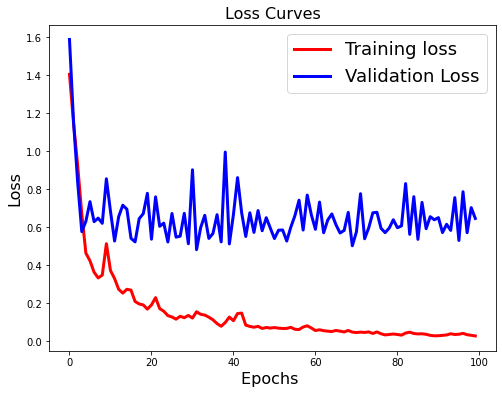

In [16]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(r.history['loss'],'r',linewidth=3.0)

plt.plot(r.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

In [17]:
target_names = []

for key in  training_set.class_indices:

    target_names.append(key)

In [18]:
target_names

['Bengin cases', 'Malignant cases', 'Normal cases']

In [19]:
#Print Classification Report
Y_pred = model.predict(test_set)

y_pred = np.argmax(Y_pred, axis=1)
from sklearn.metrics import classification_report
print('Classification Report')

print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
                 precision    recall  f1-score   support

   Bengin cases       0.09      0.15      0.11        26
Malignant cases       0.56      0.54      0.55       170
   Normal cases       0.41      0.37      0.39       126

       accuracy                           0.44       322
      macro avg       0.36      0.36      0.35       322
   weighted avg       0.47      0.44      0.45       322

